In [1]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [17]:
#import pandas
import pandas as pd

#import SQLAlchemy dependancies
from sqlalchemy import create_engine
import psycopg2

#import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as st


#import configurations for postgres db logins
from config import un
from config import pw
from config import dbn

engine = create_engine('postgresql://localhost:5432/EmployeeSQL')
connection = psycopg2.connect(user=un, password=pw, dbname=dbn)


In [88]:
#read in salary,title and employee data from postgres database to perform analysis
#we select these specific dataframes as the further analysis required by the assignment only requires info from these three tables
sal_data = pd.read_sql("SELECT * FROM salaries",connection)
title_data = pd.read_sql("SELECT * FROM titles",connection)
emp_data = pd.read_sql("SELECT * FROM employees",connection)

#check to see if there are any null values
print(sal_data.isnull().value_counts())
print(title_data.isnull().value_counts())
print(emp_data.isnull().value_counts())


emp_no  salary
False   False     300024
dtype: int64
title_id  title
False     False    7
dtype: int64
emp_no  emp_title_id  birth_date  first_name  last_name  sex    hire_date
False   False         False       False       False      False  False        300024
dtype: int64


In [84]:
#combine imported data into one DataFrame
sal_emp = pd.merge(sal_data,emp_data, on="emp_no")
sal_emp_title = pd.merge(sal_emp,title_data,left_on="emp_title_id",right_on="title_id")
set_simple = sal_emp_title[['emp_no','title','salary']]


,emp_no,salary
count,300024.000000,300024.000000
mean,253321.763392,52970.732451
std,161828.235540,14301.478491
min,10001.000000,40000.000000
25%,85006.750000,40000.000000
50%,249987.500000,48681.000000
75%,424993.250000,61758.000000
max,499999.000000,129492.000000


Text(0.5, 1.0, 'Occurrence of Salaries in Range')

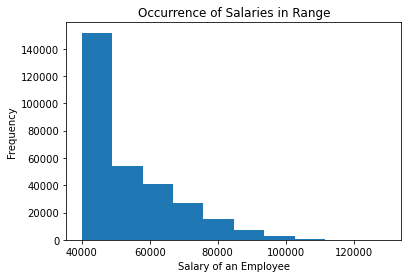

In [85]:
plt.hist(set_simple['salary'],10)

plt.xlabel("Salary of an Employee")
plt.ylabel("Frequency")
plt.title("Occurrence of Salaries in Range")

In [47]:
set_grouped=set_simple.groupby(['title'])
sal_by_title = set_grouped.mean()
sal_by_title.reset_index()
sal_by_title

,emp_no,salary
title,,
Assistant Engineer,252992.595373,48564.434447
Engineer,253654.345919,48535.336511
Manager,110780.833333,51531.041667
Senior Engineer,253038.749885,48506.799871
Senior Staff,254481.798969,58550.172704
Staff,253408.503604,58465.382850
Technique Leader,251811.432730,48582.896092


Text(0.5, 1.0, 'Average Salary by Title')

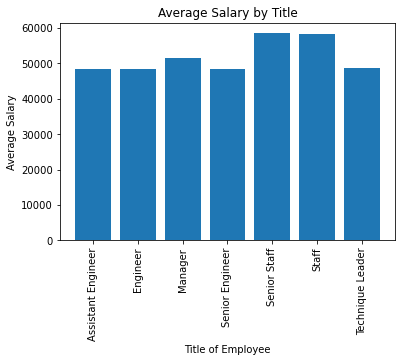

In [59]:
plt.bar(sal_by_title.index,sal_by_title.salary)

plt.xticks(rotation="90")
plt.xlabel("Title of Employee")
plt.ylabel("Average Salary")
plt.title("Average Salary by Title")

# Analysis

The range shown by the histogram that the majority of employees earn within the 40,000 to 50,000 range. This is unlikely due to the differing levels of employees within the DataFrame (i.e. ranging from "Staff" to "Managers" we'd likely expect a bit more of a spread)

The bar chart describing average Salary shows that Managers, Senior/Regular/Assistant Engineers and Technique Leaders, on average, are making less than a regular Staff member, which is also highly unlikely.